# Clean And Analyze Employee Exit Surveys
___

The aim of the following project is to answer the questions of our stakeholders, who ask:
- Are employees who only worked for the institutes for a short period of time resigning due to some kind of dissatisfaction? What about employees who have been there longer?
- Are younger employees resigning due to some kind of dissatisfaction? What about older employees?


We'll work with exit surveys from employees of [the Department of Education, Training and Employment (DETE)](https://en.wikipedia.org/wiki/Department_of_Employment,_Education_and_Training
) and [the Technical and Further Education (TAFE)](https://www.tafensw.edu.au/about) institute in Queensland, Australia.

## Introduction

We will begin with reading in the datasets and doing some initial exploration.

In [1]:
# Importing libraries
import pandas as pd
import numpy as np
# Reading in DETE survey data set
dete_survey = pd.read_csv('dete_survey.csv', encoding='UTF-8')
# Returning first rows of the data set
dete_survey.head()

,ID,SeparationType,Cease Date,DETE Start Date,Role Start Date,Position,Classification,Region,Business Unit,Employment Status,...,Kept informed,Wellness programs,Health & Safety,Gender,Age,Aboriginal,Torres Strait,South Sea,Disability,NESB
0,1,Ill Health Retirement,08/2012,1984,2004,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),08/2012,Not Stated,Not Stated,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,NaN
2,3,Voluntary Early Retirement (VER),05/2012,2011,2011,Schools Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,N,N,N,Male,61 or older,NaN,NaN,NaN,NaN,NaN
3,4,Resignation-Other reasons,05/2012,2005,2006,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,A,N,A,Female,36-40,NaN,NaN,NaN,NaN,NaN
4,5,Age Retirement,05/2012,1970,1989,Head of Curriculum/Head of Special Education,NaN,South East,NaN,Permanent Full-time,...,N,A,M,Female,61 or older,NaN,NaN,NaN,NaN,NaN


Above we can notice that DETE survey data set contains 56 columns. For answering the stakeholders questions most important will be columns:
- ID - indicates an id used to identify the participant of the survey
- Cease Date - the year or month the person's employment ended
- SeparationType - the reason why the person's employment ended
- DETE Start Date - the year the person began employment with the DETE.

In [2]:
# Returning a summary of the data set
dete_survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 822 entries, 0 to 821
Data columns (total 56 columns):
ID                                     822 non-null int64
SeparationType                         822 non-null object
Cease Date                             822 non-null object
DETE Start Date                        822 non-null object
Role Start Date                        822 non-null object
Position                               817 non-null object
Classification                         455 non-null object
Region                                 822 non-null object
Business Unit                          126 non-null object
Employment Status                      817 non-null object
Career move to public sector           822 non-null bool
Career move to private sector          822 non-null bool
Interpersonal conflicts                822 non-null bool
Job dissatisfaction                    822 non-null bool
Dissatisfaction with the department    822 non-null bool
Physical work environ

There are 822 rows in the DETE data set. In the columns we are most interested in (ID, Cease Date, SeparationType and DETE Start Date), it seems to be that all data is available (there are no missing data). However, the dete_survey dataframe contains 'Not Stated' values that indicate values are missing, but they aren't represented as NaN.

In [3]:
# Opening TAFE survey data set
tafe_survey = pd.read_csv('tafe_survey.csv', encoding='UTF-8')
# Returning first rows of the data set
tafe_survey.head()

,Record ID,Institute,WorkArea,CESSATION YEAR,Reason for ceasing employment,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,...,Workplace. Topic:Does your workplace promote a work culture free from all forms of unlawful discrimination?,Workplace. Topic:Does your workplace promote and practice the principles of employment equity?,Workplace. Topic:Does your workplace value the diversity of its employees?,Workplace. Topic:Would you recommend the Institute as an employer to others?,Gender. What is your Gender?,CurrentAge. Current Age,Employment Type. Employment Type,Classification. Classification,LengthofServiceOverall. Overall Length of Service at Institute (in years),LengthofServiceCurrent. Length of Service at current workplace (in years)
0,6.341330e+17,Southern Queensland Institute of TAFE,Non-Delivery (corporate),2010.0,Contract Expired,NaN,NaN,NaN,NaN,NaN,...,Yes,Yes,Yes,Yes,Female,26 30,Temporary Full-time,Administration (AO),1-2,1-2
1,6.341337e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Retirement,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
2,6.341388e+17,Mount Isa Institute of TAFE,Delivery (teaching),2010.0,Retirement,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
3,6.341399e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
4,6.341466e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,...,Yes,Yes,Yes,Yes,Male,41 45,Permanent Full-time,Teacher (including LVT),3-4,3-4


We can notice above that TAFE survey data set contains 72 columns. For answering the stakeholders questions most important will be columns:
- Record ID - an id used to identify the participant of the survey
- Reason for ceasing employment - the reason why the person's employment ended
- LengthofServiceOverall. Overall Length of Service at Institute (in years) - the length of the person's employment (in years)

In [4]:
# Returning a summary of the data set
tafe_survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 702 entries, 0 to 701
Data columns (total 72 columns):
Record ID                                                                                                                                                        702 non-null float64
Institute                                                                                                                                                        702 non-null object
WorkArea                                                                                                                                                         702 non-null object
CESSATION YEAR                                                                                                                                                   695 non-null float64
Reason for ceasing employment                                                                                                                                    701 non-

There are 702 rows in the TAFE data set. In the column Record ID there are all entries, Reason for ceasing employment - only one entry is missing. However, in LengthofServiceOverall column there are 596 entries available.

Based on above observations, we can notice that both the dete_survey and tafe_survey contain many columns that we don't need to complete our analysis. What is more, each data set contains many of the same columns, but the column names are different.
There are multiple columns/answers that indicate an employee resigned because they were dissatisfied.

## Missing Values and Unneccessary Columns

In this part of our project we will identify missing values and remove unnecessary columns.

In [5]:
# Reading in the DETE data set again with additional parameter
dete_survey = pd.read_csv('dete_survey.csv', na_values='Not Stated')
# Exploring the data set
dete_survey.head()

,ID,SeparationType,Cease Date,DETE Start Date,Role Start Date,Position,Classification,Region,Business Unit,Employment Status,...,Kept informed,Wellness programs,Health & Safety,Gender,Age,Aboriginal,Torres Strait,South Sea,Disability,NESB
0,1,Ill Health Retirement,08/2012,1984.0,2004.0,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),08/2012,NaN,NaN,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,NaN
2,3,Voluntary Early Retirement (VER),05/2012,2011.0,2011.0,Schools Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,N,N,N,Male,61 or older,NaN,NaN,NaN,NaN,NaN
3,4,Resignation-Other reasons,05/2012,2005.0,2006.0,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,A,N,A,Female,36-40,NaN,NaN,NaN,NaN,NaN
4,5,Age Retirement,05/2012,1970.0,1989.0,Head of Curriculum/Head of Special Education,NaN,South East,NaN,Permanent Full-time,...,N,A,M,Female,61 or older,NaN,NaN,NaN,NaN,NaN


In [6]:
dete_survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 822 entries, 0 to 821
Data columns (total 56 columns):
ID                                     822 non-null int64
SeparationType                         822 non-null object
Cease Date                             788 non-null object
DETE Start Date                        749 non-null float64
Role Start Date                        724 non-null float64
Position                               817 non-null object
Classification                         455 non-null object
Region                                 717 non-null object
Business Unit                          126 non-null object
Employment Status                      817 non-null object
Career move to public sector           822 non-null bool
Career move to private sector          822 non-null bool
Interpersonal conflicts                822 non-null bool
Job dissatisfaction                    822 non-null bool
Dissatisfaction with the department    822 non-null bool
Physical work envir

As we can notice above, there are far more missing values in DETE data set in comparison to what we have found our earlier in this project.

In [7]:
# Removing unnecessary columns 
dete_survey_updated = dete_survey.drop(dete_survey.columns[28:49], axis=1)
tafe_survey_updated = tafe_survey.drop(tafe_survey.columns[17:66], axis=1)

# Exploring the updated columns
print(dete_survey_updated.columns)
print(tafe_survey_updated.columns)

Index(['ID', 'SeparationType', 'Cease Date', 'DETE Start Date',
       'Role Start Date', 'Position', 'Classification', 'Region',
       'Business Unit', 'Employment Status', 'Career move to public sector',
       'Career move to private sector', 'Interpersonal conflicts',
       'Job dissatisfaction', 'Dissatisfaction with the department',
       'Physical work environment', 'Lack of recognition',
       'Lack of job security', 'Work location', 'Employment conditions',
       'Maternity/family', 'Relocation', 'Study/Travel', 'Ill Health',
       'Traumatic incident', 'Work life balance', 'Workload',
       'None of the above', 'Gender', 'Age', 'Aboriginal', 'Torres Strait',
       'South Sea', 'Disability', 'NESB'],
      dtype='object')
Index(['Record ID', 'Institute', 'WorkArea', 'CESSATION YEAR',
       'Reason for ceasing employment',
       'Contributing Factors. Career Move - Public Sector ',
       'Contributing Factors. Career Move - Private Sector ',
       'Contributing Fact

Because the dete_survey and tafe_survey contain many columns that we don't need to complete our analysis, we removed the unnecessary columns. Our next step will be to work with column names.

## Renaming columns

Some of column names are different but they represent the same content. Our goal in this part of the project will be to standardize the column names.

In [8]:
# Standardizing column names
dete_survey_updated.columns = dete_survey_updated.columns.str.lower().str.strip().str.replace(' ', "_")

# Exploring the updated columns
dete_survey_updated.columns

Index(['id', 'separationtype', 'cease_date', 'dete_start_date',
       'role_start_date', 'position', 'classification', 'region',
       'business_unit', 'employment_status', 'career_move_to_public_sector',
       'career_move_to_private_sector', 'interpersonal_conflicts',
       'job_dissatisfaction', 'dissatisfaction_with_the_department',
       'physical_work_environment', 'lack_of_recognition',
       'lack_of_job_security', 'work_location', 'employment_conditions',
       'maternity/family', 'relocation', 'study/travel', 'ill_health',
       'traumatic_incident', 'work_life_balance', 'workload',
       'none_of_the_above', 'gender', 'age', 'aboriginal', 'torres_strait',
       'south_sea', 'disability', 'nesb'],
      dtype='object')

In [9]:
# Renaming columns
to_rename = {'Record ID': 'id', 'CESSATION YEAR': 'cease_date', 'Reason for ceasing employment': 'separationtype', 'Gender. What is your Gender?': 'gender', 'CurrentAge. Current Age': 'age',
       'Employment Type. Employment Type': 'employment_status',
       'Classification. Classification': 'position',
       'LengthofServiceOverall. Overall Length of Service at Institute (in years)': 'institute_service',
       'LengthofServiceCurrent. Length of Service at current workplace (in years)': 'role_service'}
tafe_survey_updated = tafe_survey_updated.rename(to_rename, axis=1)

# Exploring the updated columns
tafe_survey_updated.columns

Index(['id', 'Institute', 'WorkArea', 'cease_date', 'separationtype',
       'Contributing Factors. Career Move - Public Sector ',
       'Contributing Factors. Career Move - Private Sector ',
       'Contributing Factors. Career Move - Self-employment',
       'Contributing Factors. Ill Health',
       'Contributing Factors. Maternity/Family',
       'Contributing Factors. Dissatisfaction',
       'Contributing Factors. Job Dissatisfaction',
       'Contributing Factors. Interpersonal Conflict',
       'Contributing Factors. Study', 'Contributing Factors. Travel',
       'Contributing Factors. Other', 'Contributing Factors. NONE', 'gender',
       'age', 'employment_status', 'position', 'institute_service',
       'role_service'],
      dtype='object')

In this part of the data preparation, we renamed and standardized column names. It will be easier to work with updated data sets.

## Filtering the Data

In our project we would like to get to know, what are the reasons behind employees dissatisfaction. Therefore we will examine only resignation separation types. 

In [10]:
# Finding unique values
dete_survey_updated['separationtype'].value_counts()

Age Retirement                          285
Resignation-Other reasons               150
Resignation-Other employer               91
Resignation-Move overseas/interstate     70
Voluntary Early Retirement (VER)         67
Ill Health Retirement                    61
Other                                    49
Contract Expired                         34
Termination                              15
Name: separationtype, dtype: int64

In [11]:
# Finding unique values
tafe_survey_updated['separationtype'].value_counts()

Resignation                 340
Contract Expired            127
Retrenchment/ Redundancy    104
Retirement                   82
Transfer                     25
Termination                  23
Name: separationtype, dtype: int64

We will extract only resignation types of separation. In case of DETE data set we will take into account three: Resignation-Other reasons, Resignation-Other employer, Resignation-Move overseas/interstate.

In [12]:
# Update all separation types containing the word "resignation" to 'Resignation'
dete_survey_updated['separationtype'] = dete_survey_updated['separationtype'].str.split('-').str[0]

# Check the values in the separationtype column were updated correctly
dete_survey_updated['separationtype'].value_counts()

Resignation                         311
Age Retirement                      285
Voluntary Early Retirement (VER)     67
Ill Health Retirement                61
Other                                49
Contract Expired                     34
Termination                          15
Name: separationtype, dtype: int64

In [13]:
# Select only the resignation separation types from each dataframe
dete_resignations = dete_survey_updated[dete_survey_updated['separationtype'] == 'Resignation'].copy()
tafe_resignations = tafe_survey_updated[tafe_survey_updated['separationtype'] == 'Resignation'].copy()

Since we are interested in analyze only the resignation reasons, we have extracted from both data sets the rows including the information regarding the resignation.

## Verifying the Data

Our next step will be to verify the data to check if there are any inconsistencies in each dataframe. We will start with the cease_date in dete_resignations.

In [14]:
# Finding unique values
dete_survey_updated['cease_date'].value_counts()

2012       344
2013       200
01/2014     43
12/2013     40
09/2013     34
06/2013     27
07/2013     22
10/2013     20
11/2013     16
08/2013     12
05/2013      7
05/2012      6
08/2012      2
04/2014      2
02/2014      2
07/2014      2
04/2013      2
2010         1
2014         1
09/2010      1
07/2012      1
11/2012      1
07/2006      1
09/2014      1
Name: cease_date, dtype: int64

In [15]:
# Extract the years and convert them to a float type
dete_resignations['cease_date'] = dete_resignations['cease_date'].str.split('/').str[-1]
dete_resignations['cease_date'] = dete_resignations['cease_date'].astype("float")

# Check the values again and look for outliers
dete_resignations['cease_date'].value_counts()

2013.0    146
2012.0    129
2014.0     22
2010.0      2
2006.0      1
Name: cease_date, dtype: int64

In [16]:
# Check the unique values and look for outliers
dete_resignations['dete_start_date'].value_counts().sort_values()

1963.0     1
1971.0     1
1972.0     1
1984.0     1
1977.0     1
1987.0     1
1975.0     1
1973.0     1
1982.0     1
1974.0     2
1983.0     2
1976.0     2
1986.0     3
1985.0     3
2001.0     3
1995.0     4
1988.0     4
1989.0     4
1991.0     4
1997.0     5
1980.0     5
1993.0     5
1990.0     5
1994.0     6
2003.0     6
1998.0     6
1992.0     6
2002.0     6
1996.0     6
1999.0     8
2000.0     9
2013.0    10
2009.0    13
2006.0    13
2004.0    14
2005.0    15
2010.0    17
2012.0    21
2007.0    21
2008.0    22
2011.0    24
Name: dete_start_date, dtype: int64

In [17]:
# Checking the unique values
tafe_resignations['cease_date'].value_counts().sort_values()

2009.0      2
2013.0     55
2010.0     68
2012.0     94
2011.0    116
Name: cease_date, dtype: int64

The years in both dataframes aren't completely equal. The tafe_survey_updated dataframe contains some cease dates in 2009, but the dete_survey_updated dataframe does not. 
The tafe_survey_updated dataframe also contains many more cease dates in 2010 than the dete_survey_updaed dataframe. Because we aren't interested in analyzing the results by year, we'll leave them as is.

##  Time the employee spent in their workplace

Another important step in our project will be to create a column for time the employee worked in our company. We can calculate the time of work by deducting dete_start_date from the cease_date.

In [18]:
# Creating a new column
dete_resignations['institute_service'] = dete_resignations['cease_date'] - dete_resignations['dete_start_date']
# Checking for unique values
dete_resignations['institute_service'].value_counts().head(10)

5.0     23
1.0     22
3.0     20
0.0     20
6.0     17
4.0     16
9.0     14
2.0     14
7.0     13
13.0     8
Name: institute_service, dtype: int64

We found out that most employees in DETE dataframe left the company after 5 or less years. Employees working longer than 10 years seem to be less likely to resign.

## Reasons for dissatisfaction

In order to find out why the employees were dissatisfied and left, we will analyze the data in the following columns:
- Contributing Factors. Dissatisfaction and Contributing Factors. Job Dissatisfaction for tafe_survey updated
- job_dissatisfaction, dissatisfaction_with_the_department, physical_work_environment, lack_of_recognition, lack_of_job_security, work_location, employment_conditions, work_life_balance, workload in dete_survey_updated data set.

In [19]:
# Viewing unique values
tafe_survey_updated['Contributing Factors. Dissatisfaction'].value_counts()

-                                         371
Contributing Factors. Dissatisfaction      66
Name: Contributing Factors. Dissatisfaction, dtype: int64

It looks like 66 out of all employees were dissatisfied with their job. 

In [20]:
# Viewing unique values
tafe_survey_updated['Contributing Factors. Job Dissatisfaction'].value_counts()

-                      360
Job Dissatisfaction     77
Name: Contributing Factors. Job Dissatisfaction, dtype: int64

In the next column there were 77 out of all employees, who were dissatisfied with their job. 

In [21]:
# Function for updating values in columns
def update_vals(val):
    if val == '-':
        return False
    elif pd.isnull(val):
        return np.nan
    else:
        return True
    
# Applying the function
tafe_resignations['dissatisfied'] = tafe_resignations[['Contributing Factors. Dissatisfaction', 'Contributing Factors. Job Dissatisfaction']].applymap(update_vals).any(1, skipna=False)
tafe_resignations_up = tafe_resignations.copy()

# Check the unique values after the updates
tafe_resignations_up['dissatisfied'].value_counts(dropna=False)

False    241
True      91
NaN        8
Name: dissatisfied, dtype: int64

In [22]:
# Update the values in columns related to dissatisfaction to be either True, False, or NaN
dete_resignations['dissatisfied'] = dete_resignations[['job_dissatisfaction',
       'dissatisfaction_with_the_department', 'physical_work_environment',
       'lack_of_recognition', 'lack_of_job_security', 'work_location',
       'employment_conditions', 'work_life_balance',
       'workload']].any(1, skipna=False)
dete_resignations_up = dete_resignations.copy()
dete_resignations_up['dissatisfied'].value_counts(dropna=False)

False    162
True     149
Name: dissatisfied, dtype: int64

We updated the values in columns related to dissatisfaction to be either True, False or NaN. 

## Combining the Data

Finally, it's time to combine our data sets. Our end goal is to aggregate the data according to the institute_service column, so we will have to get the data into a form that's easy to aggregate.

In [23]:
# Adding a column
dete_resignations_up['institute'] = 'DETE'
tafe_resignations_up['institute'] = 'TAFE'

# Combining the data sets
combined = pd.concat([dete_resignations_up, tafe_resignations_up], ignore_index=True, sort=False)

# Verify the number of non null values in each column
combined.notnull().sum().sort_values()

torres_strait                                            0
south_sea                                                3
aboriginal                                               7
disability                                               8
nesb                                                     9
business_unit                                           32
classification                                         161
region                                                 265
role_start_date                                        271
dete_start_date                                        283
role_service                                           290
none_of_the_above                                      311
work_life_balance                                      311
traumatic_incident                                     311
ill_health                                             311
study/travel                                           311
relocation                                             3

In [24]:
# Dropping unnecesary columns
combined_updated = combined.dropna(axis=1, thresh=500).copy()

We added a column to each dataframe in order to more easily distinguish between the two. Then, we combined the data sets and dropped all thecolumns with less than 500 non null values. Right now we are ready to clean and service the column.

## Clean and service the column

In institute_service column there are values in various formats, which makes it more difficult to work with it.

In [25]:
combined_updated['institute_service'].value_counts()

Less than 1 year      73
1-2                   64
3-4                   63
5-6                   33
11-20                 26
5.0                   23
1.0                   22
7-10                  21
3.0                   20
0.0                   20
6.0                   17
4.0                   16
2.0                   14
9.0                   14
7.0                   13
More than 20 years    10
8.0                    8
13.0                   8
15.0                   7
20.0                   7
12.0                   6
22.0                   6
17.0                   6
14.0                   6
10.0                   6
18.0                   5
16.0                   5
23.0                   4
11.0                   4
24.0                   4
39.0                   3
32.0                   3
21.0                   3
19.0                   3
26.0                   2
28.0                   2
30.0                   2
25.0                   2
36.0                   2
27.0                   1


We will convert the numbers in institute_service column into categories based on [business wire article](https://www.businesswire.com/news/home/20171108006002/en/Age-Number-Engage-Employees-Career-Stage).
We'll use the slightly modified definitions below:
- New: Less than 3 years at a company,
- Experienced: 3-6 years at a company,
- Established: 7-10 years at a company,
- Veteran: 11 or more years at a company.

In [26]:
# Changing the type 
combined_updated['institute_service'] = combined_updated['institute_service'].astype('str')
# Extracting the years
combined_updated['institute_service'] = combined_updated['institute_service'].str.extract(r'(\d+)').astype('float')
# Checking the output
combined_updated['institute_service'].value_counts()

1.0     159
3.0      83
5.0      56
7.0      34
11.0     30
0.0      20
20.0     17
6.0      17
4.0      16
9.0      14
2.0      14
13.0      8
8.0       8
15.0      7
17.0      6
10.0      6
12.0      6
14.0      6
22.0      6
16.0      5
18.0      5
24.0      4
23.0      4
39.0      3
19.0      3
21.0      3
32.0      3
28.0      2
36.0      2
25.0      2
30.0      2
26.0      2
29.0      1
38.0      1
42.0      1
27.0      1
41.0      1
35.0      1
49.0      1
34.0      1
33.0      1
31.0      1
Name: institute_service, dtype: int64

We've already extracted the years of service from each pattern. Now, we'll map each value to one of the career stage definitions.

In [27]:
# Function for mapping
def map_vals(x):
    if x >= 11:
        return 'Veteran'
    elif 7 <= x < 11:
        return 'Established'
    elif 3 <= x < 7:
        return 'Experienced'
    elif pd.isnull(x):
        return np.nan
    else:
        return 'New'
       
# Applying the function
combined_updated['service_cat'] = combined_updated['institute_service'].apply(map_vals)

In [28]:
# Exploring new column
combined_updated['service_cat'].value_counts()

New            193
Experienced    172
Veteran        136
Established     62
Name: service_cat, dtype: int64

We categorized the workers, and found out that there are:
- 193 new employees working less than 3 years for the company (they are the biggest group of workers), 
- 172 experienced employees working less than 7 years but at least 3 years or more,
- 136 established workers, who spent in company at least 7 years but not longer than 11 years,
- 62 established workers, who are employed at least for 11 years.

## Initial Analysis

To start our analysis we need to work with dissatisfied column a little bit more because it contains missing values. Once we deal with the missing values we can aggregate the column and find out the number of people in each group and more.

In [29]:
# Exploring the dissatisfied column
combined_updated['dissatisfied'].value_counts(dropna=False)

False    403
True     240
NaN        8
Name: dissatisfied, dtype: int64

There are only 8 missing values in the column. Becuase it is a little amount we decided to fill the missing values with the value that occurs most frequently, i.e. False.

In [30]:
# Replace missing values with most common value
combined_updated['dissatisfied'] = combined_updated['dissatisfied'].fillna(False)

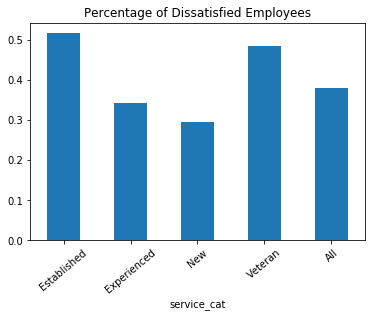

In [49]:
# Aggregating the column
average = combined_updated.pivot_table(values='dissatisfied', index='service_cat', margins=True)
# Plotting the results
%matplotlib inline
average.plot(kind='bar', rot=40, title="Percentage of Dissatisfied Employees", legend=False)

On average, most dissatisfied workers are coming from established (about 52%) and veteran category (about 49%).

## Further Analysis

In our further analysis we will work with age column in order to find out if employee's age influenced the number of resignation due to dissatisfaction.

In [32]:
# Exploring the age column
combined_updated['age'].value_counts()

51-55            71
41-45            48
41  45           45
46-50            42
36-40            41
46  50           39
26-30            35
21  25           33
31  35           32
26  30           32
36  40           32
56 or older      29
31-35            29
21-25            29
56-60            26
61 or older      23
20 or younger    10
Name: age, dtype: int64

Becuase the unique values in age column are inconsistent we will categorize them. We will bring the following groups:
- 25 or younger,
- 26-40,
- 41-65,
- 65 or older.

In [33]:
# Changing the type 
combined_updated['age'] = combined_updated['age'].astype('str')
# Extracting the years
combined_updated['age'] = combined_updated['age'].str.extract(r'(\d+)').astype('float')
# Checking the output
combined_updated['age'].value_counts()

41.0    93
46.0    81
36.0    73
51.0    71
26.0    67
21.0    62
31.0    61
56.0    55
61.0    23
20.0    10
Name: age, dtype: int64

In [34]:
# Function for mapping
def map_age(x):
    if x >= 65:
        return '65 or older'
    elif 41 <= x < 65:
        return '41-65'
    elif 26 <= x < 41:
        return '26-40'
    elif pd.isnull(x):
        return np.nan
    else:
        return '25 or younger'
       
# Applying the function
combined_updated['age'] = combined_updated['age'].apply(map_age)

In [35]:
# Exploring the age column
combined_updated['age'].value_counts()

41-65            323
26-40            201
25 or younger     72
Name: age, dtype: int64

There are 72 workers below the age of 26. The most employees are in group 41-65 years old. Now, we would like to get to know how many people in each group resinged due to some kind of dissatisfaction.

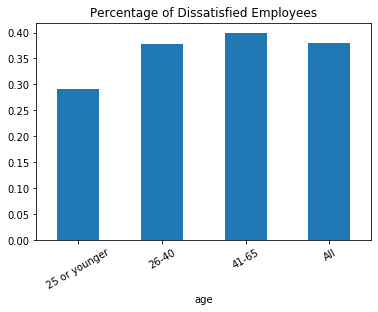

In [51]:
# Aggregating the column
average_age = combined_updated.pivot_table(values='dissatisfied', index='age', margins=True)
# Plotting the results
%matplotlib inline
average_age.plot(kind='bar', rot=30, title= "Percentage of Dissatisfied Employees", legend=False)

As we can see on the bar plot, the highest percentage of dissatisfied resignations comes from 41-65 year group (about 40%). Workers 25 years old or younger were least likely to resign due to dissatisfaction.

## Conclusions
___

In our project we aimed to answer the following questions:
- Are employees who only worked for the institutes for a short period of time resigning due to some kind of dissatisfaction? What about employees who have been there longer?

There are about 30% workers who resigned due to some dissatisfaction in early years of employment (up to 3 years). The emloyees who have been there longer (at least 7 years long) are more likely to resign due to dissatisfaction (almost 50%).

The second set of questions was:
- Are younger employees resigning due to some kind of dissatisfaction? What about older employees?

Younger employees are less likely to resign due to dissatisfaction. Employees in age between 41-65 are most likely to resign due to dissatisfaction.